* Name: Kartik Ghule
* Roll No: 13156
* Div & Batch: A - A3

# N-Queens 

Enter the number of queens:  4


One solution for 4-Queens:

Backtracking Steps:
Row 0, Col 0: Place
Row 1, Col 2: Place
Row 1, Col 2: Backtrack
Row 1, Col 3: Place
Row 2, Col 1: Place
Row 2, Col 1: Backtrack
Row 1, Col 3: Backtrack
Row 0, Col 0: Backtrack
Row 0, Col 1: Place
Row 1, Col 3: Place
Row 2, Col 0: Place
Row 3, Col 2: Place
. Q . . 
. . . Q 
Q . . . 
. . Q . 



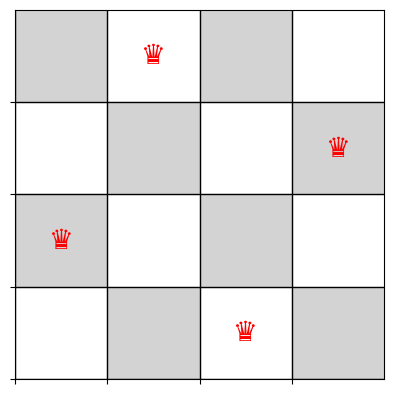

Do you want to continue? (yes/no):  yes
Enter the number of queens:  7


One solution for 7-Queens:

Backtracking Steps:
Row 0, Col 0: Place
Row 1, Col 2: Place
Row 2, Col 4: Place
Row 3, Col 1: Place
Row 4, Col 3: Place
Row 4, Col 3: Backtrack
Row 3, Col 1: Backtrack
Row 3, Col 6: Place
Row 4, Col 1: Place
Row 5, Col 3: Place
Row 6, Col 5: Place
Q . . . . . . 
. . Q . . . . 
. . . . Q . . 
. . . . . . Q 
. Q . . . . . 
. . . Q . . . 
. . . . . Q . 



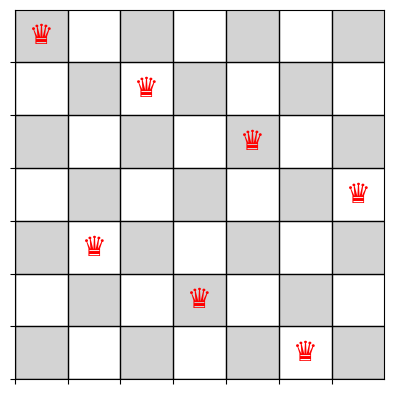

Do you want to continue? (yes/no):  yes
Enter the number of queens:  9


One solution for 9-Queens:

Backtracking Steps:
Row 0, Col 0: Place
Row 1, Col 2: Place
Row 2, Col 4: Place
Row 3, Col 1: Place
Row 4, Col 3: Place
Row 5, Col 8: Place
Row 5, Col 8: Backtrack
Row 4, Col 3: Backtrack
Row 4, Col 7: Place
Row 4, Col 7: Backtrack
Row 4, Col 8: Place
Row 4, Col 8: Backtrack
Row 3, Col 1: Backtrack
Row 3, Col 6: Place
Row 4, Col 1: Place
Row 5, Col 3: Place
Row 6, Col 5: Place
Row 6, Col 5: Backtrack
Row 5, Col 3: Backtrack
Row 4, Col 1: Backtrack
Row 4, Col 3: Place
Row 4, Col 3: Backtrack
Row 4, Col 8: Place
Row 5, Col 3: Place
Row 6, Col 1: Place
Row 6, Col 1: Backtrack
Row 6, Col 5: Place
Row 6, Col 5: Backtrack
Row 5, Col 3: Backtrack
Row 4, Col 8: Backtrack
Row 3, Col 6: Backtrack
Row 3, Col 7: Place
Row 4, Col 1: Place
Row 5, Col 3: Place
Row 6, Col 5: Place
Row 6, Col 5: Backtrack
Row 5, Col 3: Backtrack
Row 5, Col 8: Place
Row 6, Col 5: Place
Row 6, Col 5: Backtrack
Row 5, Col 8: Backtrack
Row 4, Col 1: Backtrack
Row 4, Col 3: Place
Row 5, Col 8: Pl

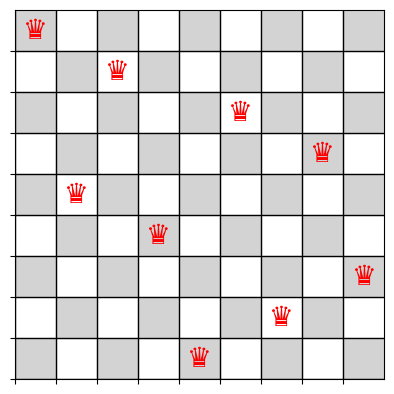

In [ ]:
import matplotlib.pyplot as plt

def print_solution(board, N):
    for i in range(N):
        for j in range(N):
            print("Q" if board[i] == j else ".", end=" ")
        print()
    print()

def is_safe(board, row, col, N):
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return False
    return True

def solve_nqueens_util(board, row, N, solution, steps):
    if row == N:  
        solution.extend(board[:])
        return True
    
    for col in range(N):
        if is_safe(board, row, col, N):
            board[row] = col
            steps.append((row, col, "Place"))  # Track placement
            if solve_nqueens_util(board, row + 1, N, solution, steps):
                return True
            steps.append((row, col, "Backtrack"))  # Track backtracking
            board[row] = -1  
    return False

def solve_nqueens(N):
    board = [-1] * N
    solution = []
    steps = []
    solve_nqueens_util(board, 0, N, solution, steps)
    return solution, steps

def draw_chessboard(solution, N):
    fig, ax = plt.subplots()
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='black', linestyle='-', linewidth=1)
    
    for i in range(N):
        for j in range(N):
            if (i + j) % 2 == 0:
                ax.add_patch(plt.Rectangle((j, N - i - 1), 1, 1, color="lightgray"))
    
    for row, col in enumerate(solution):
        ax.text(col + 0.5, N - row - 0.5, "♛", fontsize=20, ha='center', va='center', color='red')
    
    plt.xlim(0, N)
    plt.ylim(0, N)
    plt.gca().set_aspect('equal')
    plt.show()

if __name__ == "__main__":
    while True:
        N = int(input("Enter the number of queens: "))
        solution, steps = solve_nqueens(N)
        print(f"One solution for {N}-Queens:")
        
        print("\nBacktracking Steps:")
        for step in steps:
            row, col, action = step
            print(f"Row {row}, Col {col}: {action}")
        
        print_solution(solution, N)
        draw_chessboard(solution, N)
        
        cont = input("Do you want to continue? (yes/no): ").strip().lower()
        if cont != 'yes':
            break



# Graph Coloring

Choose a problem:
1. N-Queens
2. Graph Coloring
Enter choice:  2
Enter number of vertices in the graph:  6


Enter the adjacency matrix (space-separated rows):


 0 1 1 0 0 0
 1 0 1 1 0 0
 1 1 0 1 1 0
 0 1 1 0 1 1
 0 0 1 1 0 1
 0 0 0 1 1 0
Enter number of colors:  15


Coloring Solution: [1, 2, 3, 1, 2, 3]


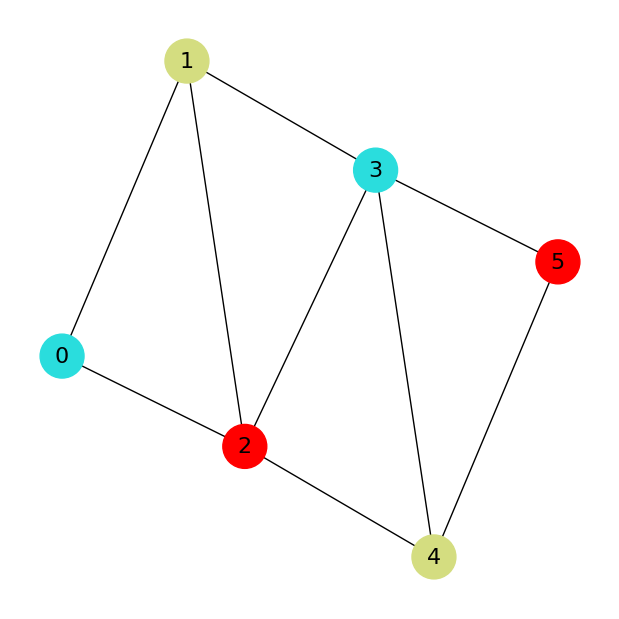

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def print_solution(board, N):
    for i in range(N):
        for j in range(N):
            print("Q" if board[i] == j else ".", end=" ")
        print()
    print()

def is_safe(board, row, col, N):
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return False
    return True

def solve_nqueens_util(board, row, N, solution, steps):
    if row == N:  
        solution.extend(board[:])
        return True
    
    for col in range(N):
        if is_safe(board, row, col, N):
            board[row] = col
            steps.append((row, col, "Place"))  # Track placement
            if solve_nqueens_util(board, row + 1, N, solution, steps):
                return True
            steps.append((row, col, "Backtrack"))  # Track backtracking
            board[row] = -1  
    return False

def solve_nqueens(N):
    board = [-1] * N
    solution = []
    steps = []
    solve_nqueens_util(board, 0, N, solution, steps)
    return solution, steps

def draw_chessboard(solution, N):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='black', linestyle='-', linewidth=1)
    
    for i in range(N):
        for j in range(N):
            if (i + j) % 2 == 0:
                ax.add_patch(plt.Rectangle((j, N - i - 1), 1, 1, color="lightgray"))
    
    for row, col in enumerate(solution):
        ax.text(col + 0.5, N - row - 0.5, "♛", fontsize=20, ha='center', va='center', color='red')
    
    plt.xlim(0, N)
    plt.ylim(0, N)
    plt.gca().set_aspect('equal')
    plt.show()

def graph_coloring(graph, m, color, v):
    if v == len(graph):
        return True
    
    for c in range(1, m + 1):
        if all(color[i] != c for i in range(len(graph)) if graph[v][i] == 1):
            color[v] = c
            if graph_coloring(graph, m, color, v + 1):
                return True
            color[v] = 0  # Backtrack
    return False

def solve_graph_coloring(graph, m):
    color = [0] * len(graph)
    if graph_coloring(graph, m, color, 0):
        return color
    return None

def draw_colored_graph(graph, colors):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G)
    color_map = [plt.cm.rainbow(c / max(colors)) for c in colors]
    
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='black', node_size=1000, font_size=16)
    plt.show()

if __name__ == "__main__":
    choice = int(input("Choose a problem:\n1. N-Queens\n2. Graph Coloring\nEnter choice: "))
    
    if choice == 1:
        N = int(input("Enter the number of queens: "))
        solution, steps = solve_nqueens(N)
        print(f"One solution for {N}-Queens:")
        
        print("\nBacktracking Steps:")
        for step in steps:
            row, col, action = step
            print(f"Row {row}, Col {col}: {action}")
        
        print_solution(solution, N)
        draw_chessboard(solution, N)
    elif choice == 2:
        num_vertices = int(input("Enter number of vertices in the graph: "))
        graph = []
        print("Enter the adjacency matrix (space-separated rows):")
        for _ in range(num_vertices):
            graph.append(list(map(int, input().split())))
        
        m = int(input("Enter number of colors: "))
        result = solve_graph_coloring(graph, m)
        if result:
            print("Coloring Solution:", result)
            draw_colored_graph(graph, result)
        else:
            print("No solution found.")



In [ ]:
Choose a problem:
1. N-Queens
2. Graph Coloring
Enter choice: 2
Enter number of vertices in the graph: 6
Enter the adjacency matrix (space-separated rows):
0 1 1 0 0 0
1 0 1 1 0 0
1 1 0 1 1 0
0 1 1 0 1 1
0 0 1 1 0 1
0 0 0 1 1 0
Enter number of colors: 3
